# Part 1

In [1]:
# Import the required Packages
import numpy as np
from scipy import signal
import sounddevice as sd
import IPython.display as ipd
import matplotlib.pyplot as plt

## Creating our first sound

Sound is just continuous and regular waves traveling through a medium (typically air). These waves can be represented as oscillations that vary in amplitude (loudness) and frequency (pitch). One of the beautiful things about digital audio is that we can create these waves programmatically.


Let's start by looking at how we can model a simple sine wave, which is the purest form of sound:


In [2]:
# We define the sample rate (how many points per second), duration, and frequency
sample_rate = 44100  # CD-quality audio (samples per second)
duration = 2  # seconds
frequency = 440  # Hz (A4 note)
amplitude = 0.4 # loudness

# Range of the sound: nsamples points equaly spaced in the range
sample_space = np.linspace(
    0, # start
    duration, # stop
    int(sample_rate * duration), # Number of samples to generate
    endpoint=False
)

# Convert Frequency in Hz to Angular Frequency cause that is what numpy needs to create a wave
def angular_freq(frequency, sample_space=sample_space):
    return 2*np.pi*frequency*sample_space

sine_wave = np.sin(angular_freq(frequency, sample_space))*amplitude

# IPython Audio widget, automatically normalizes the audio before playback, Set normalise=False to hear the amplitude change
ipd.Audio(sine_wave, rate=sample_rate, normalize=False)

#### Sine wave

Also called **fundamental**, Sine waves are the simplest periodic waveforms, meaning they oscillate smoothly and continuously with a single frequency. Any complex waveform can be constructed by combining different sine waves with varying amplitudes and frequencies


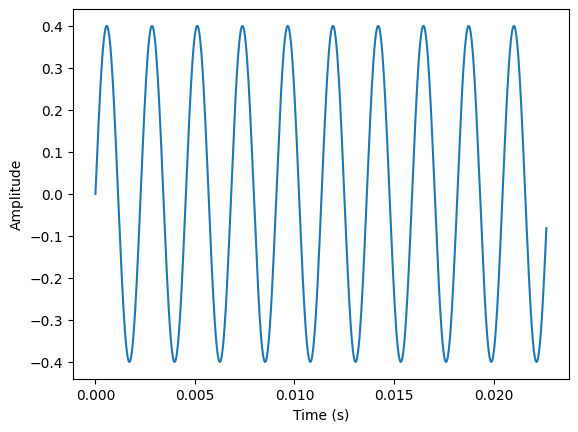

In [3]:
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot(sample_space[:1000], sine_wave[:1000])

#### Square wave

Square waves are a step away from smoothness and more toward buzziness. They contain Harmonics (frequencies that are whole number multiples of the fundamental frequency). Square waveforms drone at low frequencies, and by the nature of their upper and lower envelopes are the loudest waveform

#### Triangle wave

This wave is in between a square wave and sine wave: It does not have the ups and downs of a square wave (not as buzzy) but not as smooth as a sine wave (taper off as they get further away from the fundamental)

#### Sawtooth wave

This variation of the triangle wave is much more jagged and so looks like a saw! It is the buzziest sounding of them all, sounding even harsher than a square wave, and that’s because it’s the richest in terms of harmonics so you can make some really cool sounds by filtering out frequencies

Square Wave


Triangle Wave


SawTooth Wave


Text(0.5, 1.0, 'Sawtooth Wave')

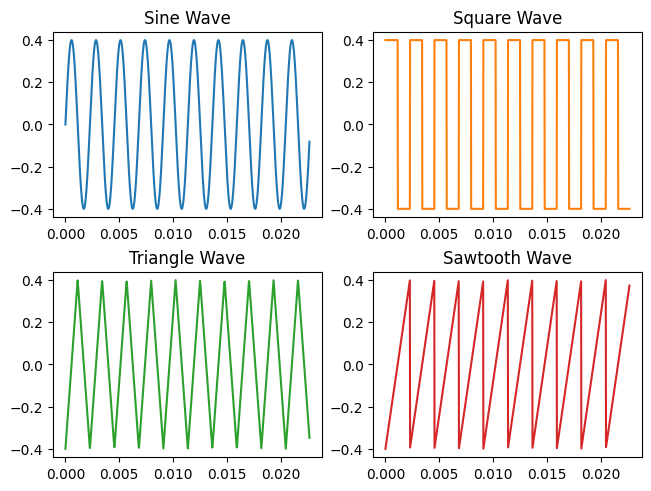

In [4]:
print("Square Wave")
square_wave_data = signal.square(angular_freq(frequency))*amplitude
ipd.display(ipd.Audio(square_wave_data, rate=sample_rate, normalize=False))
print("Triangle Wave")
tri_wave_data = signal.sawtooth(angular_freq(frequency),  width=0.5)*amplitude
ipd.display(ipd.Audio(tri_wave_data, rate=sample_rate, normalize=False))
print("SawTooth Wave")
saw_wave_data = signal.sawtooth(angular_freq(frequency))*amplitude
ipd.display(ipd.Audio(saw_wave_data, rate=sample_rate, normalize=False))

fig, axs = plt.subplots(2, 2, constrained_layout=True)
axs[0, 0].plot(sample_space[:1000], sine_wave[:1000])
axs[0, 0].set_title('Sine Wave')
axs[0, 1].plot(sample_space[:1000], square_wave_data[:1000], 'tab:orange')
axs[0, 1].set_title('Square Wave')
axs[1, 0].plot(sample_space[:1000], tri_wave_data[:1000], 'tab:green')
axs[1, 0].set_title('Triangle Wave')
axs[1, 1].plot(sample_space[:1000], saw_wave_data[:1000], 'tab:red')
axs[1, 1].set_title('Sawtooth Wave')

### [E] Make a simple Sequence

Stack Sounds
To play notes one after the other, frequencies need to be stacked Horizontally to create a Sequence

Use Numpy to stack arrays in sequence horizontally

In [5]:
# Frequency 100Hz to 400Hz
tone1 = signal.sawtooth(angular_freq(50)) * 0.2
tone2 = signal.sawtooth(angular_freq(60)) * 0.2
tone3 = signal.sawtooth(angular_freq(40)) * 0.2
tone4 = signal.sawtooth(angular_freq(30)) * 0.2

sequence = np.hstack([tone1,tone2,tone3, tone4])
ipd.Audio(sequence, rate=sample_rate)

## Playing around with frequencies

### [E] Kick with Square Wave

In [6]:
frequency = 1
duration = 3
sample_space = np.linspace(
    0, # start
    duration, # stop
    int(sample_rate * duration), # Number of samples to generate
    endpoint=False
)
square_wave_data = signal.square(angular_freq(frequency, sample_space))*amplitude
ipd.Audio(square_wave_data, rate=sample_rate, normalize=False)
# Adding a Cutoff + Filters would make it a crisp Kick

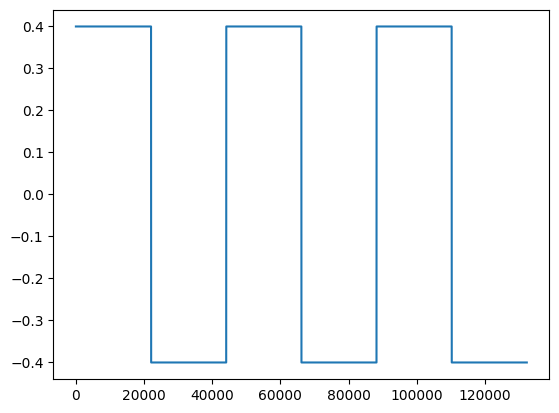

In [7]:
plt.plot(square_wave_data)

# Oscillators

An oscillator is anything that oscillates, usually in some repetetive fashion. In synthesizers, oscillators are the fundamental sound-generating components that produce repeating waveforms ( ine, square, sawtooth, triangle) at a specific frequency, forming the basis for all the sounds you can create. 


### [E] Make a simple Oscillator

In [8]:
def angular_freq(frequency, duration, sample_rate=44100):
    sample_space = np.linspace(
        0, # start
        duration, # stop
        int(sample_rate * duration),
        endpoint=False
    )
    return 2*np.pi*frequency*sample_space

def get_sine_wave(frequency, amp, duration):
    return np.sin(angular_freq(frequency, duration)) * amp

def get_triangle_wave(frequency, amp, duration):
    return signal.sawtooth(angular_freq(frequency, duration),  width=0.5)*amp

def get_square_wave(frequency, amp, duration):
    return signal.square(angular_freq(frequency, duration)) * amp

def get_sawtooth_wave(frequency, amp, duration):
    return signal.sawtooth(angular_freq(frequency, duration)) * amp

In [9]:
class Oscillator:
    def __init__(self, shape="sine"):
        self.shape = shape
        self.get_wave = dict(
            sine=get_sine_wave,
            tri=get_triangle_wave,
            square=get_square_wave,
            saw=get_sawtooth_wave,
        ).get(self.shape)

    def play(self, frequency, amp=1, duration=1):
        waveform = self.get_wave(frequency, amp, duration)
        sd.play(waveform)
        return waveform

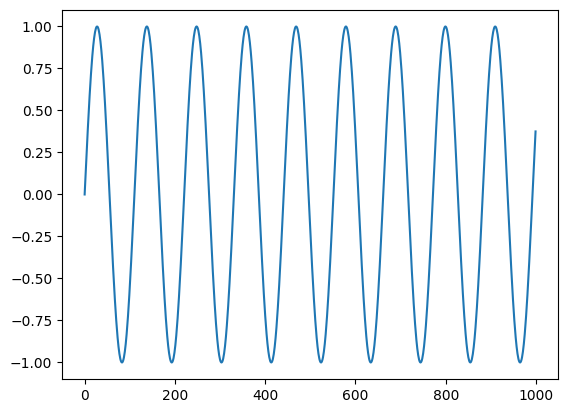

In [10]:
osc = Oscillator("sine")
sine_wave = osc.play(400, 1, 0.5)
plt.plot(sine_wave[:1000])

## Multiple Oscillators

Many synthesizers have multiple oscillators, allowing for more complex and layered sounds. They also allow for oscillator sync, where one oscillator's frequency is locked to another, creating unique rhythmic and tonal effects


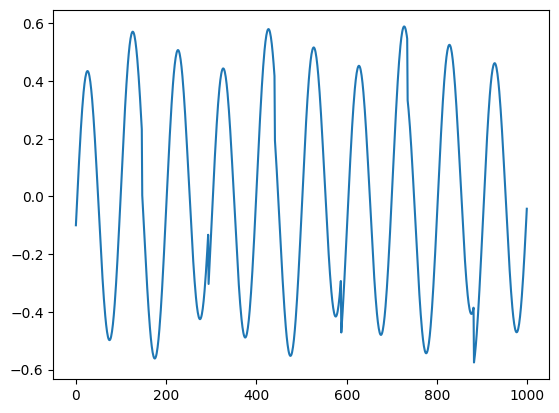

In [14]:
sine_wave = get_sine_wave(440, 0.5, duration)
saw_wave = get_sawtooth_wave(300, 0.1, duration)

# Combine the waveforms
combined = sine_wave + saw_wave
plt.plot(combined[:1000])

In [15]:
ipd.Audio(combined, rate=sample_rate)

## Oscillator sync
Oscillator sync is a feature in some synthesizers with two or more VCOs, DCOs, or "virtual" oscillators. As one oscillator finishes a cycle, it resets the period of another oscillator, forcing the latter to have the same base frequency. This can produce a harmonically rich sound, the timbre of which can be altered by varying the synced oscillator's frequency. A synced oscillator that resets other oscillator(s) is called the leader; the oscillators which it resets are called followers. There are two common forms of oscillator sync which appear on synthesizers: Hard Sync and Soft Sync. According to Sound on Sound journalist Gordon Reid, oscillator sync is "one of the least understood facilities on any synthesizer".


Imagine you have two people walking on a track. The first person (the master oscillator) walks at a steady pace. The second person (the follower oscillator) walks faster, but whenever they see the first person pass a specific point on the track, they adjust their walking.

As the master gently influences the follower's timing it creates interesting overlapping patterns that neither oscillator could make alone

This is soft sync, there is also Hard sync where the follower completely restarts rather than adjust



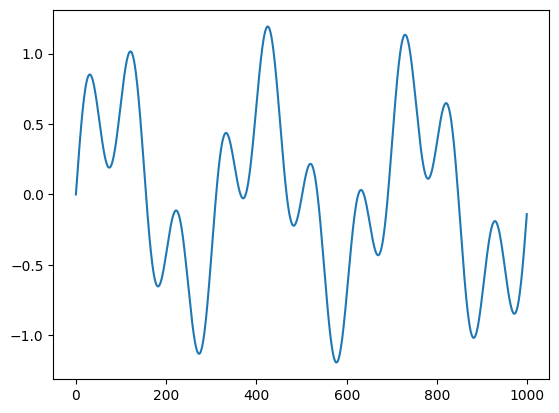

In [17]:
master_freq = 440
duration = 2
sync_ratio = 0.3
t = np.linspace(0, duration, int(sample_rate * duration), False) # sample space

master_wave = get_sine_wave(master_freq, 0.5, duration)
follower_freq = master_freq * sync_ratio

phase_mod = np.cumsum(np.abs(master_wave)) / sample_rate
follower_wave = 0.7 * np.sin(2 * np.pi * follower_freq * t + phase_mod)

combined = master_wave + follower_wave

plt.plot(combined[:1000])

In [18]:
ipd.Audio(combined, rate=sample_rate)